In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import emcee
import chainconsumer
import matplotlib as mpl

import config
import parameter_estimation

In [2]:
filename = "standard_qcd_axion_parameter.npz"
df = np.load(config.data_path + "/" + filename)
samples = df["samples"].reshape((-1, len(parameter_estimation.inital_guess)))

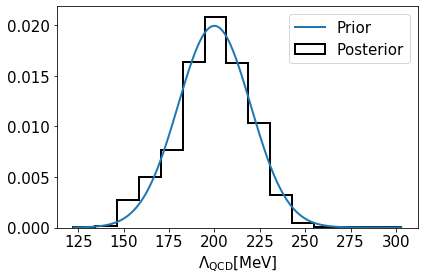

In [24]:
i = 3
Lambda_QCDs = samples[:, i]
plt.hist(Lambda_QCDs / 1e6, histtype="step", bins=15, density=True, color="black", linewidth=2, label="Posterior")
vals = np.linspace(np.min(Lambda_QCDs), np.max(Lambda_QCDs), Lambda_QCDs.size) / 1e6
x_err = parameter_estimation.errors[i] / 1e6
x0 = parameter_estimation.inital_guess[i] / 1e6
plt.plot(vals, np.exp(- (vals - x0)**2 / (2 * x_err**2)) / np.sqrt(2 * np.pi * x_err**2), linewidth=2, label="Prior")
plt.xlabel(r"$\Lambda_\mathrm{QCD} [\mathrm{MeV}]$", fontsize=15)
ax = plt.gca()
ax.tick_params(labelsize=15)
plt.legend(fontsize=15, loc=1)
plt.tight_layout()
plt.savefig(config.plot_path + "/qcd_free_paramter_Lambda_QCD_histogram.pdf")

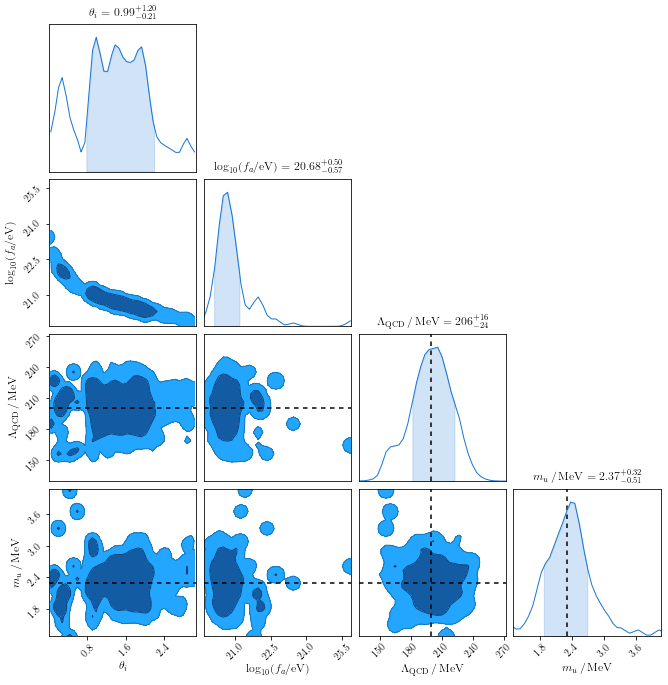

In [3]:
names = [
 r'$\theta_i$',
 r'$\log_{10} (f_a / \mathrm{eV})$',
 r'$M_\mathrm{pl}$',
 r'$\Lambda_\mathrm{QCD} \, / \, \mathrm{MeV}$',
 '$m_u \, / \, \mathrm{MeV}$',
 '$m_d$',
 '$m_\pi$',
 r'$f_\pi$',
 '$T_0$',
 r'$\rho_c$',
]


LambdaQCD_label = names[3]
m_u_label = names[4]

c = chainconsumer.ChainConsumer()
s = samples.copy()
s[:, 4] /= 1e6
s[:, 3] /= 1e6

c.add_chain(s, parameters=names)
c.configure(smooth=True, plot_point=True, bins=20)
c.plotter.plot(filename=config.plot_path + "/qcd_free_parameter_triangle_plot.pdf", display=False,
             parameters=[
                 r'$\theta_i$',
                 r'$\log_{10} (f_a / \mathrm{eV})$',
                 LambdaQCD_label,
                 m_u_label],
             truth={LambdaQCD_label: parameter_estimation.inital_guess[3]/ 1e6, 
                    m_u_label: parameter_estimation.inital_guess[4] / 1e6},
            figsize="PAGE",
)
mpl.rcParams.update(mpl.rcParamsDefault)

del s

PARAMETER  INITIAL-VALUE    INITIAL-ERROR   MCMC-MEAN      +MCMC-ERR      -MCMC-ERR
theta_i    1.000000e+00 +/- 0.000000e+00 vs 1.385049e+00 + 6.222005e-01 - 8.893672e-01
log_f_a    2.100000e+01 +/- 0.000000e+00 vs 2.071254e+01 + 8.179659e-01 - 3.474463e-01
M_pl       2.435403e+27 +/- 2.792596e+22 vs 2.435402e+27 + 3.052508e+22 - 2.968925e+22
Lambda_QCD 2.000000e+08 +/- 2.000000e+07 vs 2.003479e+08 + 1.891608e+07 - 2.078037e+07
m_u        2.300000e+06 +/- 3.750000e+05 vs 2.334093e+06 + 3.733309e+05 - 4.283171e+05
m_d        4.800000e+06 +/- 3.250000e+05 vs 4.779433e+06 + 3.532762e+05 - 3.200322e+05
m_pi       1.349770e+08 +/- 5.000000e+02 vs 1.349769e+08 + 6.555021e+02 - 7.220083e+02
f_pi       9.192388e+07 +/- 5.000000e+06 vs 9.075004e+07 + 5.936612e+06 - 6.211860e+06
T0         2.348653e-04 +/- 5.170398e-09 vs 2.348653e-04 + 5.148301e-09 - 5.340347e-09
rho_c      3.667106e-11 +/- 9.808371e-14 vs 3.666216e-11 + 8.739349e-14 - 1.177295e-13


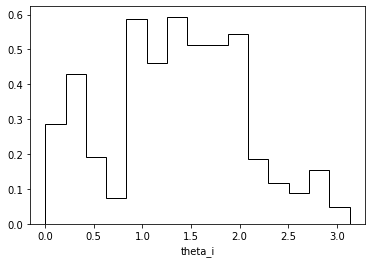

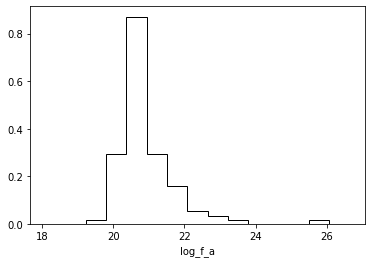

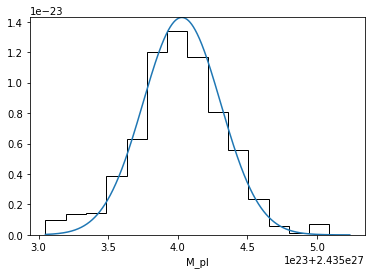

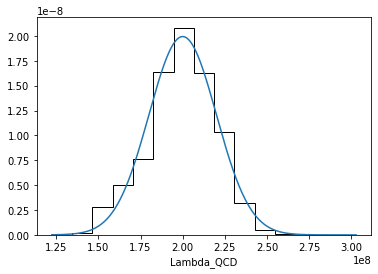

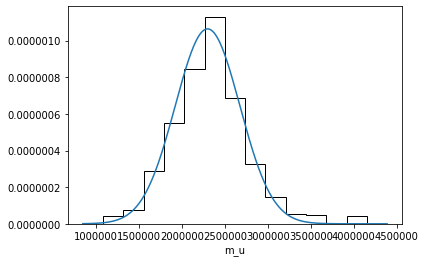

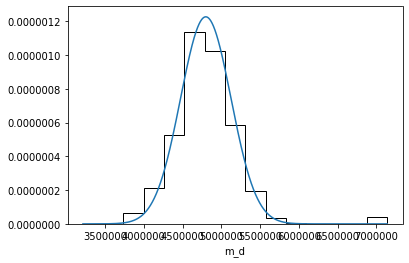

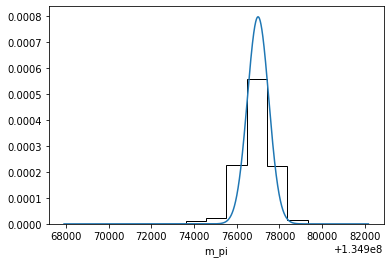

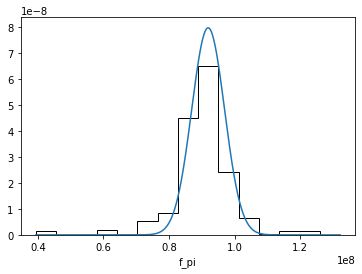

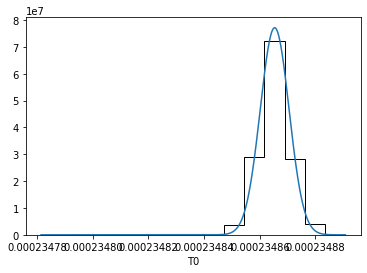

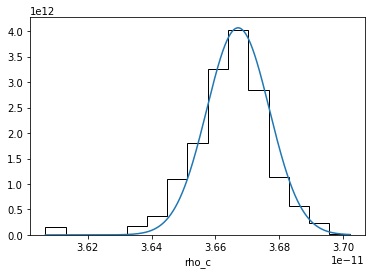

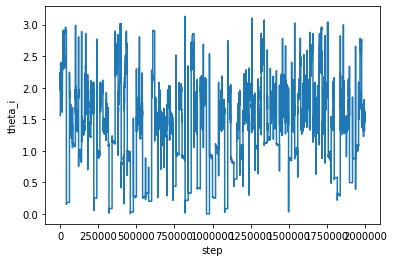

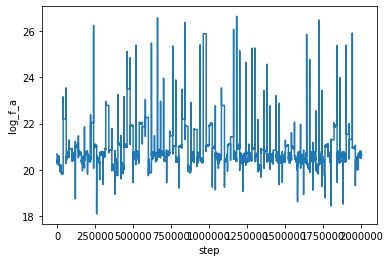

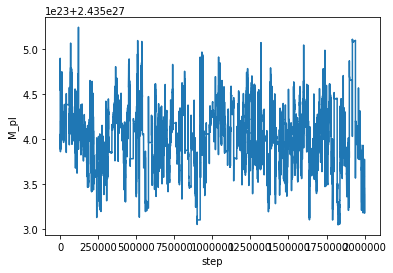

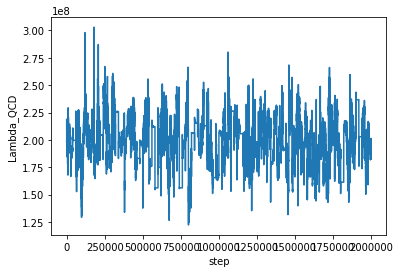

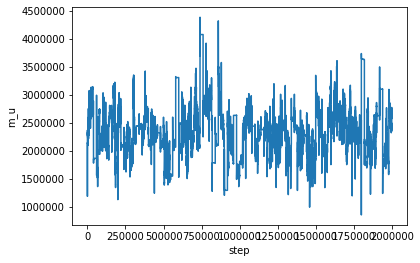

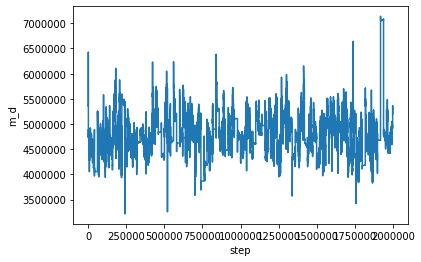

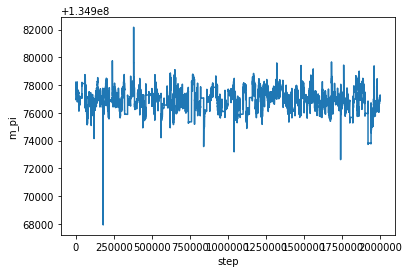

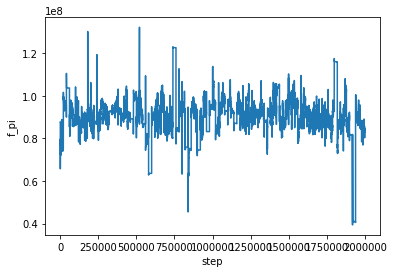

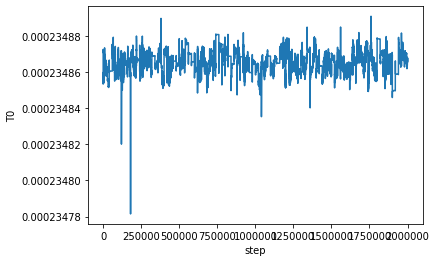

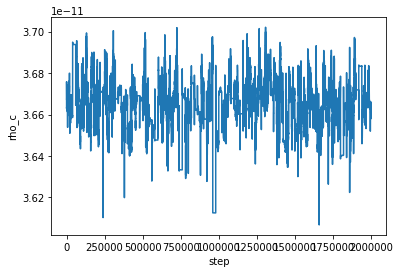

Text(0.5, 0, 'f_a')

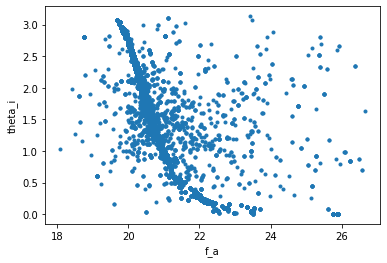

In [2]:


# compute parameter including error bounds
if "parameter" in df:
    parameter = df["parameter"]
else:
    #                          mean value, lower error, upper error
    parameter = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))

# print table of parameters
print("PARAMETER  INITIAL-VALUE    INITIAL-ERROR   MCMC-MEAN      +MCMC-ERR      -MCMC-ERR")
for name, ip, ie, p in zip(parameter_estimation.parameter_names, 
                           parameter_estimation.inital_guess, 
                           parameter_estimation.errors, parameter):
    print(name + " " * (len("Lambda_QCD") - len(name)), 
          "%e" % ip, "+/-", "%e" % ie, "vs", "%e" % p[0], "+", "%e" % p[1], "-", "%e" % p[2])

# corner plots
#try:
#    corner.corner(samples, labels=parameter_estimation.parameter_names)
#except:
#    pass
plt.show()

# histograms for each parameter including priors
for i, (name, x0, x_err) in enumerate(zip(parameter_estimation.parameter_names,
                                          parameter_estimation.inital_guess,
                                          parameter_estimation.errors)):
    ps = samples[:, i]
    if i > 1:
        vals = np.linspace(np.min(ps), np.max(ps), ps.size)
        plt.plot(vals, np.exp(- (vals - x0)**2 / (2 * x_err**2)) / np.sqrt(2 * np.pi * x_err**2))
    try:
        plt.hist(ps, histtype="step", bins=15, density=True, color="black")
    except:
        print(name, "doesnt work")
    plt.xlabel(name)
    plt.show()

# samples 
for i, name in enumerate(parameter_estimation.parameter_names):
    plt.plot(samples[:, i])
    plt.ylabel(name)
    plt.xlabel("step")
    plt.show()

# scatter theta_i vs f_a
plt.plot(samples[:, 1], samples[:, 0], ".")
plt.ylabel("theta_i")
plt.xlabel("f_a")

In [ ]:
s = df["samples"]
chain = s.reshape((-1, parameter_estimation.ndim))
plt.plot(chain[:, -1])

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  9.99868620e-01,   9.99639827e-01,   9.99699505e-01, ...,
          9.99861637e-01,   9.99656284e-01,   9.99709589e-01],
       [  9.99741847e-01,   9.99306571e-01,   9.99405971e-01, ...,
          9.99724099e-01,   9.99298666e-01,   9.99428182e-01],
       ..., 
       [  1.46630039e-07,   1.53377307e-07,  -4.55422139e-06, ...,
          2.68694467e-07,   4.63327026e-07,   3.58330946e-08],
       [  9.77533595e-08,   1.02251538e-07,  -3.03614760e-06, ...,
          1.79129644e-07,   3.08884684e-07,   2.38887297e-08],
       [  4.88766797e-08,   5.11257688e-08,  -1.51807380e-06, ...,
          8.95648222e-08,   1.54442342e-07,   1.19443648e-08]])

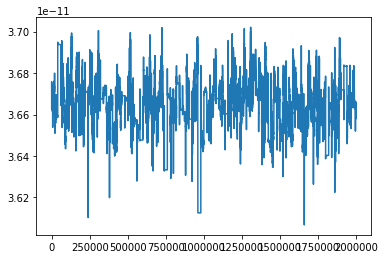

In [7]:
fn = emcee.autocorr.function(chain)

In [14]:
len(parameter_estimation.parameter_names), fn.shape

(10, (2000000, 10))

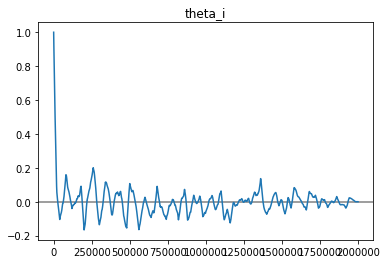

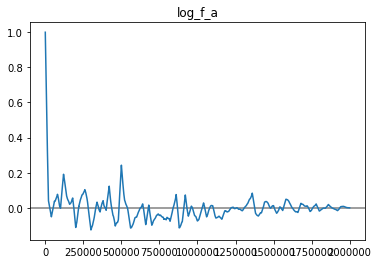

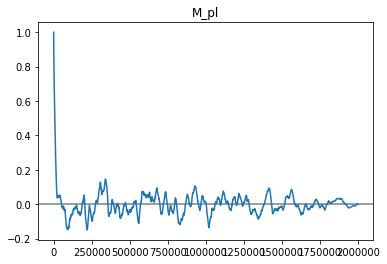

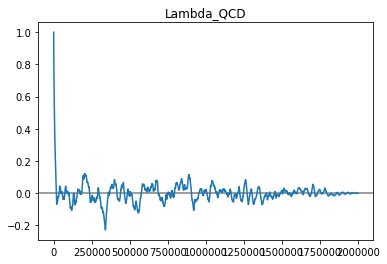

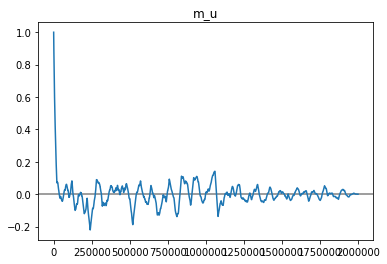

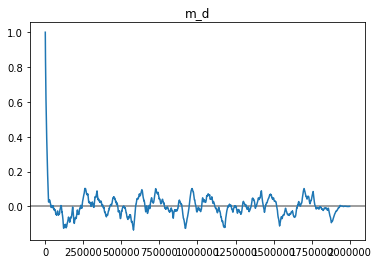

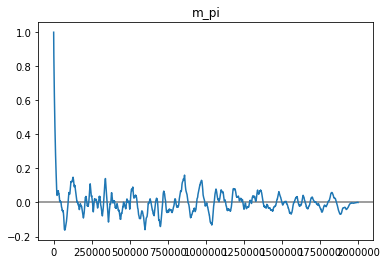

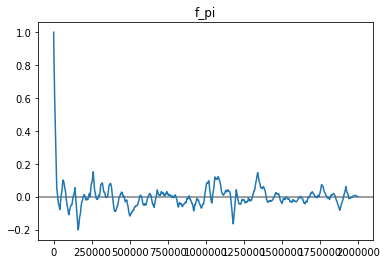

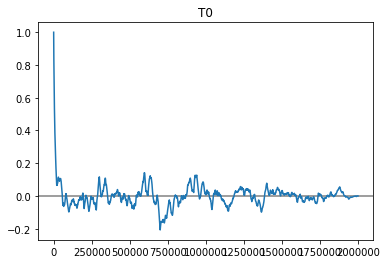

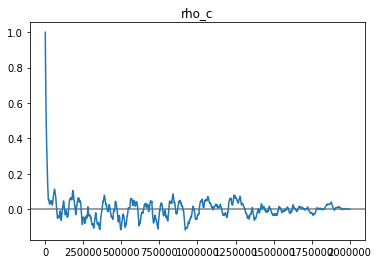

In [20]:
for i, name in enumerate(parameter_estimation.parameter_names):
    plt.axhline(0, color="grey")
    plt.plot(fn[:, i])
    plt.title(name)
    plt.show()

In [22]:
emcee.autocorr.integrated_time?